In [29]:
from pathlib import Path
import pandas as pd
import pyvista as pv
import numpy as np
import os
from knee_stress_predict.config import raw_data_dir, processed_data_dir
from knee_stress_predict.objects.KneeGeometry import KneeGeometry
from knee_stress_predict.objects.data_set_vis import plot_subdivisions_tibia_car

# PATIENTS DATA LOADING

This notebook loads data from set_2. Set_2 was provided by Kalin. Raw data for that set is located in data/raw/set_2. The set consists of 28 patients' data that include knee geometry (7 elements) and a pickle file with tibia contact pressure data.

## Loading knee geometry for each patient



In [30]:
patients_knees = {}
data_set_name = "set_2"
data_dir = Path.joinpath(raw_data_dir, data_set_name)
for i, folder_name in enumerate(os.listdir(data_dir)):
    patient_dir = Path.joinpath(data_dir, folder_name)
    patient_knee = KneeGeometry(patient_dir)
    patients_knees[folder_name] = patient_knee

### Number of points, volume and bound size in each structure

Create a Data Frame that shows _______ for each knee structure for all patients:
- size of the point cloud (number of points)
- volume
- bounds for x
- bounds for y
- bounds for z

Below is the example of a point cloud of Tibia bone for Patient 9905863M00

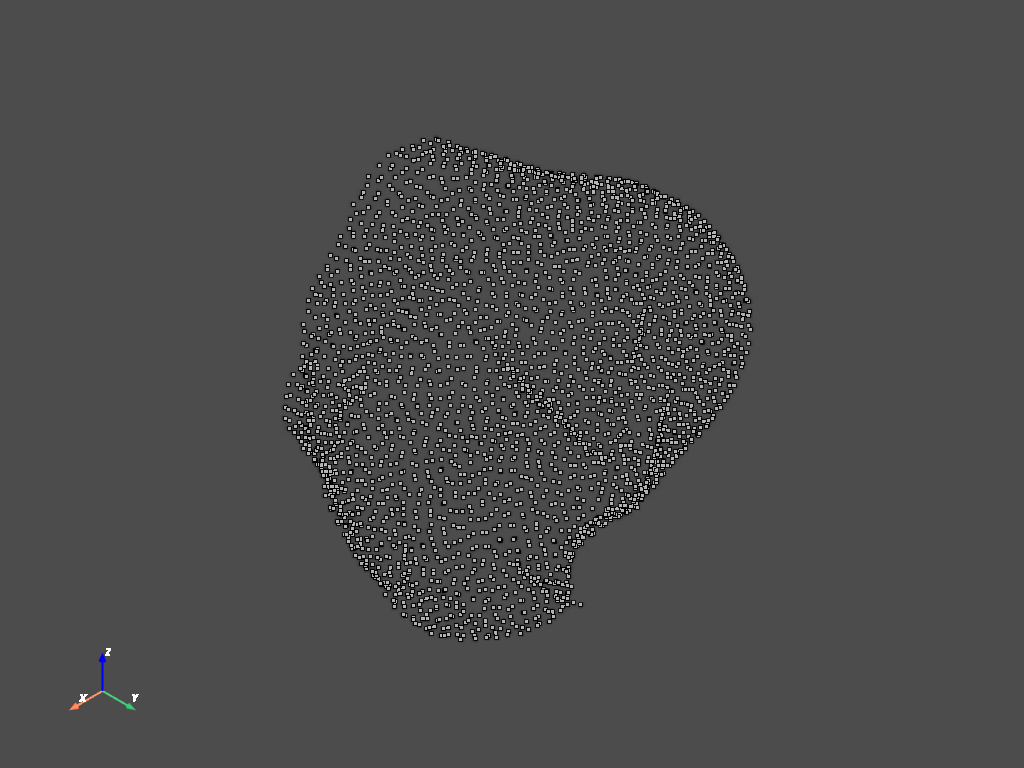

In [31]:
knee = patients_knees["9905863M00"]
tibia_point_cloud = pv.PolyData(knee.tibia.points)
tibia_point_cloud.plot(eye_dome_lighting=True, jupyter_backend="static")

In [32]:
knee_df = pd.DataFrame()

for key, value in patients_knees.items():
    df = {'Code': key,
          'Patella_PN': value.patella.n_points,
          'Femur_PN': value.femur.n_points,
          'Tibia_PN': value.tibia.n_points,
          'Patella_Car_PN': value.pat_cart.n_points,
          'Femur_Car_PN': value.fem_cart.n_points,
          'Tibia_M_Car_PN': value.tibia_cart_med.n_points,
          'Tibia_L_Car_PN': value.tibia_cart_lat.n_points,

          'Patella_volume': value.patella.volume,
          'Femur_volume': value.femur.volume,
          'Tibia_volume': value.tibia.volume,
          'Patella_Car_volume': value.pat_cart.volume,
          'Femur_Car_volume': value.fem_cart.volume,
          'Tibia_M_Car_volume': value.tibia_cart_med.volume,
          'Tibia_L_Car_volume': value.tibia_cart_lat.volume,

        # The form of bounds is: (xmin, xmax, ymin, ymax, zmin, zmax).
          'Patella_bounds_x': abs(value.patella.bounds[0] - value.patella.bounds[1]),
          'Femur_bounds_x': abs(value.femur.bounds[0] - value.femur.bounds[1]),
          'Tibia_bounds_x': abs(value.tibia.bounds[0] - value.tibia.bounds[1]),
          'Patella_Car_bounds_x': abs(value.pat_cart.bounds[0] - value.pat_cart.bounds[1]),
          'Femur_Car_bounds_x': abs(value.fem_cart.bounds[0] - value.fem_cart.bounds[1]),
          'Tibia_M_Car_bounds_x': abs(value.tibia_cart_med.bounds[0] - value.tibia_cart_med.bounds[1]),
          'Tibia_L_Car_bounds_x': abs(value.tibia_cart_lat.bounds[0] - value.tibia_cart_lat.bounds[1]),

          'Patella_bounds_y': abs(value.patella.bounds[2] - value.patella.bounds[3]),
          'Femur_bounds_y': abs(value.femur.bounds[2] - value.femur.bounds[3]),
          'Tibia_bounds_y': abs(value.tibia.bounds[2] - value.tibia.bounds[3]),
          'Patella_Car_bounds_y': abs(value.pat_cart.bounds[2] - value.pat_cart.bounds[3]),
          'Femur_Car_bounds_y': abs(value.fem_cart.bounds[2] - value.fem_cart.bounds[3]),
          'Tibia_M_Car_bounds_y': abs(value.tibia_cart_med.bounds[2] - value.tibia_cart_med.bounds[3]),
          'Tibia_L_Car_bounds_y': abs(value.tibia_cart_lat.bounds[2] - value.tibia_cart_lat.bounds[3]),

          'Patella_bounds_z': abs(value.patella.bounds[4] - value.patella.bounds[5]),
          'Femur_bounds_z': abs(value.femur.bounds[4] - value.femur.bounds[5]),
          'Tibia_bounds_z': abs(value.tibia.bounds[4] - value.tibia.bounds[5]),
          'Patella_Car_bounds_z': abs(value.pat_cart.bounds[4] - value.pat_cart.bounds[5]),
          'Femur_Car_bounds_z': abs(value.fem_cart.bounds[4] - value.fem_cart.bounds[5]),
          'Tibia_M_Car_bounds_z': abs(value.tibia_cart_med.bounds[4] - value.tibia_cart_med.bounds[5]),
          'Tibia_L_Car_bounds_z': abs(value.tibia_cart_lat.bounds[4] - value.tibia_cart_lat.bounds[5]),
          }
    knee_df = knee_df.append(df, ignore_index=True)
knee_df.head()

,Code,Patella_PN,Femur_PN,Tibia_PN,Patella_Car_PN,Femur_Car_PN,Tibia_M_Car_PN,Tibia_L_Car_PN,Patella_volume,Femur_volume,...,Femur_Car_bounds_y,Tibia_M_Car_bounds_y,Tibia_L_Car_bounds_y,Patella_bounds_z,Femur_bounds_z,Tibia_bounds_z,Patella_Car_bounds_z,Femur_Car_bounds_z,Tibia_M_Car_bounds_z,Tibia_L_Car_bounds_z
0,9905863M00,923,4011,3009,4745,19095,2840,2840,28699.200017,229006.314467,...,48.066266,9.819381,13.747335,27.492164,73.671344,70.012669,17.505247,77.312018,51.821435,38.669460
1,9905863M12,884,4110,2790,4585,19025,2840,2840,28197.827325,246641.112279,...,47.016725,7.843438,13.953374,26.860005,72.792441,63.912004,15.834497,76.198050,49.585413,39.525092
2,9908796M00,641,2861,2268,4120,20295,2840,2840,15222.439598,141352.763773,...,41.613434,9.992703,13.570709,19.841214,63.757277,51.757118,14.277669,66.848989,42.175751,34.364839
3,9908796M12,625,3022,2171,4715,19385,2840,2840,14931.893097,149215.886238,...,40.589075,8.809906,13.458181,20.166843,64.151329,51.898573,13.794617,66.567807,42.911019,33.854403
4,9912946M00,788,4137,2689,5575,21035,2840,2840,22692.085291,248976.459037,...,46.886831,15.422482,8.785706,22.540873,70.235115,63.212181,16.312369,74.647781,45.878323,53.532299


## Simulation length

While looking at the whole data set, we realized that the initial data set of 28 knees are scans of 14 knees, but they have been preprocessed in two different ways. And the difference in max pressure between preprocessing types is comparable with the difference caused by geometry. So we decided to add simulation length based on the knee name as a feature:
- M00 ending in "Code" - stays for 0 mouths simulation
- M12 ending in "Code" - stays for 12 mouths simulation

The graph below demonstrates the problem

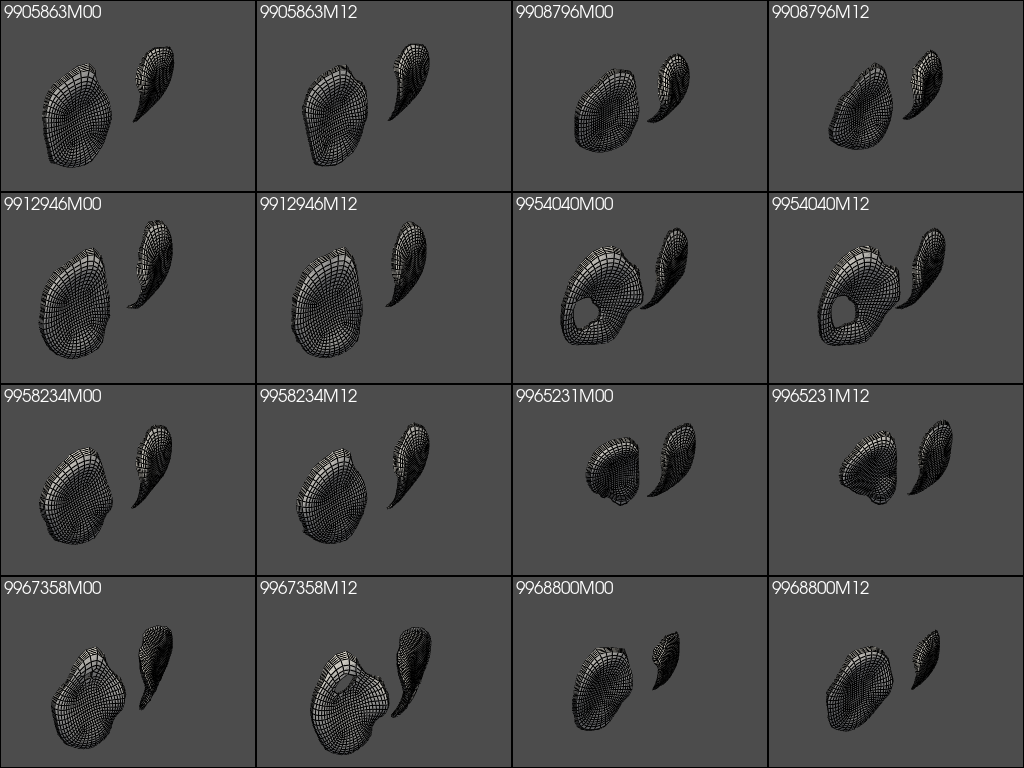

In [33]:
patients_knees = {}
data_set_name = "set_2"
data_dir = Path.joinpath(raw_data_dir, data_set_name)
rows, cols = 4, 4
for i, folder_name in enumerate(os.listdir(data_dir)):
    if i > rows * cols - 1:
        break
    patient_dir = Path.joinpath(data_dir, folder_name)
    patient_knee = KneeGeometry(patient_dir)
    patients_knees[folder_name] = patient_knee

plotter = plot_subdivisions_tibia_car(patients_knees, rows, cols)
plotter.show(jupyter_backend="static")

Let's add simulation length as a feature

In [34]:
knee_df["Simulation_len"] = np.where(knee_df['Code'].str.contains("M00"), 0, 12)
knee_df

,Code,Patella_PN,Femur_PN,Tibia_PN,Patella_Car_PN,Femur_Car_PN,Tibia_M_Car_PN,Tibia_L_Car_PN,Patella_volume,Femur_volume,...,Tibia_M_Car_bounds_y,Tibia_L_Car_bounds_y,Patella_bounds_z,Femur_bounds_z,Tibia_bounds_z,Patella_Car_bounds_z,Femur_Car_bounds_z,Tibia_M_Car_bounds_z,Tibia_L_Car_bounds_z,Simulation_len
0,9905863M00,923,4011,3009,4745,19095,2840,2840,28699.200017,229006.314467,...,9.819381,13.747335,27.492164,73.671344,70.012669,17.505247,77.312018,51.821435,38.669460,0
1,9905863M12,884,4110,2790,4585,19025,2840,2840,28197.827325,246641.112279,...,7.843438,13.953374,26.860005,72.792441,63.912004,15.834497,76.198050,49.585413,39.525092,12
2,9908796M00,641,2861,2268,4120,20295,2840,2840,15222.439598,141352.763773,...,9.992703,13.570709,19.841214,63.757277,51.757118,14.277669,66.848989,42.175751,34.364839,0
3,9908796M12,625,3022,2171,4715,19385,2840,2840,14931.893097,149215.886238,...,8.809906,13.458181,20.166843,64.151329,51.898573,13.794617,66.567807,42.911019,33.854403,12
4,9912946M00,788,4137,2689,5575,21035,2840,2840,22692.085291,248976.459037,...,15.422482,8.785706,22.540873,70.235115,63.212181,16.312369,74.647781,45.878323,53.532299,0
5,9912946M12,791,4298,2533,5685,20945,2840,2840,22884.798440,258760.708517,...,13.808537,9.145256,24.797586,70.868968,61.794427,17.945412,74.694045,44.778685,54.848365,12
6,9954040M00,803,3417,2512,5015,20230,2840,2350,23008.003160,182608.626657,...,14.648708,13.249430,26.287107,65.060680,57.686642,17.962609,68.861511,41.209505,50.400081,0
7,9954040M12,812,3233,2740,4885,20345,2840,2360,22994.325369,172181.530610,...,14.222025,12.871125,26.083210,65.312921,57.659401,17.280128,69.320039,41.165844,50.319550,12
8,9958234M00,759,3696,2606,5235,21865,2840,2840,20235.363396,208302.746227,...,12.652546,9.159565,21.064244,66.811838,63.803365,12.930812,71.117317,41.892000,50.649900,0
9,9958234M12,752,3674,2669,5225,22195,2840,2840,20204.268573,207124.042497,...,12.363443,7.829719,22.138786,66.978543,65.157606,13.450240,70.870164,42.959333,49.449277,12


### Distance between femur cartilages and tibia bone

Below is the visualization of the implicit distance between tibia cartilages and the femur bone.

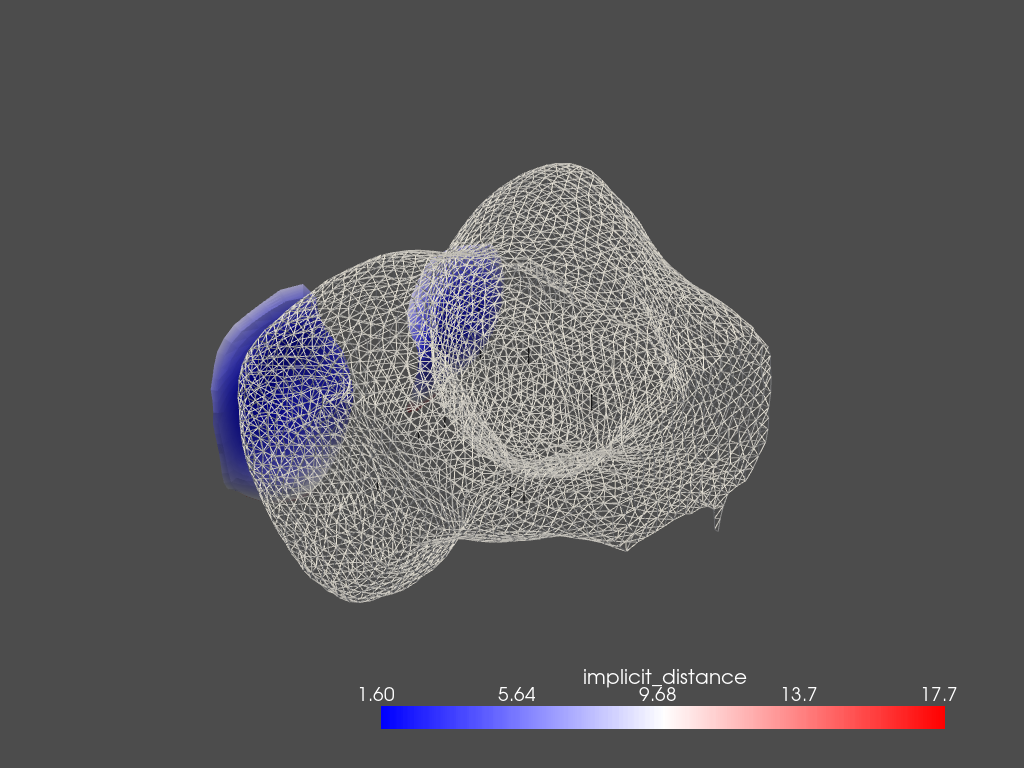

In [35]:
surf_femur = knee.femur.extract_surface()
_ = knee.tibia_cart_med.compute_implicit_distance(surf_femur, inplace=True)
_ = knee.tibia_cart_lat.compute_implicit_distance(surf_femur, inplace=True)

pl = pv.Plotter()
_ = pl.add_mesh(knee.tibia_cart_med, scalars='implicit_distance', cmap='bwr')
_ = pl.add_mesh(knee.tibia_cart_lat, scalars='implicit_distance', cmap='bwr')
_ = pl.add_mesh(surf_femur, color='w', style='wireframe')
pl.show(jupyter_backend="static")


In [36]:
implicit_distance_df = pd.DataFrame()

for key, value in patients_knees.items():
      surf_femur = value.femur.extract_surface()
      _ = value.tibia_cart_med.compute_implicit_distance(surf_femur, inplace=True)
      _ = value.tibia_cart_lat.compute_implicit_distance(surf_femur, inplace=True)

      impl_dist_tibia_cart_lat = value.tibia_cart_lat.active_scalars
      impl_dist_tibia_cart_med = value.tibia_cart_med.active_scalars

      df = {'Code': key,
            'Max_dist_femur_tibia_lat_car': max(impl_dist_tibia_cart_lat),
            'Min_dist_femur_tibia_lat_car': min(impl_dist_tibia_cart_lat),
            'Mean_dist_femur_tibia_lat_car': np.mean(impl_dist_tibia_cart_lat),
            'Max_dist_femur_tibia_med_car': max(impl_dist_tibia_cart_med),
            'Min_dist_femur_tibia_med_car': min(impl_dist_tibia_cart_med),
            'Mean_dist_femur_tibia_med_car': np.mean(impl_dist_tibia_cart_med),
            }
      implicit_distance_df = implicit_distance_df.append(df, ignore_index=True)
implicit_distance_df.head()

,Code,Max_dist_femur_tibia_lat_car,Min_dist_femur_tibia_lat_car,Mean_dist_femur_tibia_lat_car,Max_dist_femur_tibia_med_car,Min_dist_femur_tibia_med_car,Mean_dist_femur_tibia_med_car
0,9905863M00,17.745715,2.039169,6.118655,12.363764,1.604390,4.737838
1,9905863M12,17.898652,1.921611,5.881292,11.342142,1.238408,4.577601
2,9908796M00,17.383859,1.526717,5.834900,11.786139,1.642169,4.761267
3,9908796M12,15.747611,1.651787,5.670845,9.728744,1.010164,4.052701
4,9912946M00,13.779237,1.205597,4.272830,20.666032,2.178122,6.670601


### Contact pressure data

In this part, we find the maximum contact pressure for each time point, denoted frame_XXX. The difference between this notebook and the previous version, "patiens_data_loading_set2.ipynb" is that the earlier version keeps only maximal data among all time points: from frame_000 to frame_240. Keeping all data allows us to do training based on frame.


In [37]:
max_tib_lat_contact_pressure = pd.DataFrame()
max_tib_med_contact_pressure = pd.DataFrame()

for i, folder_name in enumerate(os.listdir(data_dir)):
    patient_dir = Path.joinpath(data_dir, folder_name)
    cpress_tib_cart_lat = pd.read_pickle(
          patient_dir / "CPRESS_TIB_CART_LAT_NODES.pckl",
          compression={"method": "gzip", "compresslevel": 1, "mtime": 1},  # important line
          )
    cpress_tib_cart_med = pd.read_pickle(
          patient_dir / "CPRESS_TIB_CART_MED_NODES.pckl",
          compression={"method": "gzip", "compresslevel": 1, "mtime": 1},  # important line
          )
    cpress_tib_cart_lat_max = cpress_tib_cart_lat.max(axis=0)
    cpress_tib_cart_med_max = cpress_tib_cart_med.max(axis=0)

    med = cpress_tib_cart_med_max.sort_index().to_frame().T
    lat = cpress_tib_cart_lat_max.sort_index().to_frame().T
    med["Code"] = folder_name
    lat["Code"] = folder_name

    max_tib_lat_contact_pressure = max_tib_lat_contact_pressure.append(lat, ignore_index=True)
    max_tib_med_contact_pressure = max_tib_med_contact_pressure.append(med, ignore_index=True)

max_tib_lat_contact_pressure = max_tib_lat_contact_pressure.set_index('Code').add_prefix('lat_')
max_tib_med_contact_pressure = max_tib_med_contact_pressure.set_index('Code').add_prefix('med_')

In [41]:
max_tib_med_contact_pressure.head()

,med_frame_000,med_frame_001,med_frame_002,med_frame_003,med_frame_004,med_frame_005,med_frame_006,med_frame_007,med_frame_008,med_frame_009,...,med_frame_231,med_frame_232,med_frame_233,med_frame_234,med_frame_235,med_frame_236,med_frame_237,med_frame_238,med_frame_239,med_frame_240
Code,,,,,,,,,,,,,,,,,,,,,
9905863M00,6.611789,6.370533,6.274528,6.287338,6.305632,6.712655,6.664549,6.357985,6.047641,5.980255,...,7.940522,8.114698,8.086311,8.015185,7.980772,7.937262,7.907591,7.878760,8.074722,7.987107
9905863M12,6.452644,6.820900,6.825043,6.703509,6.456080,6.737623,6.543795,6.402107,6.430162,7.059173,...,8.946852,8.747979,8.417266,8.344149,8.372133,8.370408,8.596495,8.629192,8.235795,8.145109
9908796M00,8.687181,8.754945,7.951304,7.317388,7.429111,7.207585,7.150220,7.319840,7.532477,7.071424,...,10.066787,10.434282,10.759167,11.088811,11.352691,11.744940,12.900606,12.137175,12.298610,12.747186
9908796M12,10.176933,9.949962,9.619430,8.679954,8.287500,8.485158,8.587360,8.225782,8.584753,7.943115,...,11.839959,12.119081,12.394084,12.853664,13.399544,14.055142,16.243515,13.738163,14.097919,14.264049
9912946M00,5.602037,5.168147,4.959132,4.689206,5.043017,4.751199,4.629022,4.150094,4.729949,4.659543,...,8.264437,8.744334,8.920675,8.164564,8.124532,7.814567,7.941459,8.397485,9.203511,8.622799


## Link all data

Now we need to link all data together and save the output as .csv

In [42]:
result = pd.merge(knee_df, implicit_distance_df, on="Code")
result = pd.merge(result, max_tib_lat_contact_pressure, on="Code")
result = pd.merge(result, max_tib_med_contact_pressure, on="Code")
result

,Code,Patella_PN,Femur_PN,Tibia_PN,Patella_Car_PN,Femur_Car_PN,Tibia_M_Car_PN,Tibia_L_Car_PN,Patella_volume,Femur_volume,...,med_frame_231,med_frame_232,med_frame_233,med_frame_234,med_frame_235,med_frame_236,med_frame_237,med_frame_238,med_frame_239,med_frame_240
0,9905863M00,923,4011,3009,4745,19095,2840,2840,28699.200017,229006.314467,...,7.940522,8.114698,8.086311,8.015185,7.980772,7.937262,7.907591,7.878760,8.074722,7.987107
1,9905863M12,884,4110,2790,4585,19025,2840,2840,28197.827325,246641.112279,...,8.946852,8.747979,8.417266,8.344149,8.372133,8.370408,8.596495,8.629192,8.235795,8.145109
2,9908796M00,641,2861,2268,4120,20295,2840,2840,15222.439598,141352.763773,...,10.066787,10.434282,10.759167,11.088811,11.352691,11.744940,12.900606,12.137175,12.298610,12.747186
3,9908796M12,625,3022,2171,4715,19385,2840,2840,14931.893097,149215.886238,...,11.839959,12.119081,12.394084,12.853664,13.399544,14.055142,16.243515,13.738163,14.097919,14.264049
4,9912946M00,788,4137,2689,5575,21035,2840,2840,22692.085291,248976.459037,...,8.264437,8.744334,8.920675,8.164564,8.124532,7.814567,7.941459,8.397485,9.203511,8.622799
5,9912946M12,791,4298,2533,5685,20945,2840,2840,22884.798440,258760.708517,...,9.214134,9.436297,10.116617,11.398787,12.224302,10.590812,9.509462,9.449929,9.582999,8.858046
6,9954040M00,803,3417,2512,5015,20230,2840,2350,23008.003160,182608.626657,...,19.147572,15.116287,13.531854,15.764213,14.066882,17.350437,18.653992,13.406596,15.773174,18.946312
7,9954040M12,812,3233,2740,4885,20345,2840,2360,22994.325369,172181.530610,...,10.667857,10.417480,10.339953,11.016376,11.634765,11.229431,11.648008,11.479815,11.997889,12.955767
8,9958234M00,759,3696,2606,5235,21865,2840,2840,20235.363396,208302.746227,...,6.941909,6.842664,6.783639,6.708703,6.727243,6.913268,6.510352,6.397964,6.315529,6.462003
9,9958234M12,752,3674,2669,5225,22195,2840,2840,20204.268573,207124.042497,...,9.722022,10.054302,9.890096,9.805895,9.761503,9.837078,9.859464,10.412395,10.144455,10.161654


In [43]:
output_path = Path.joinpath(processed_data_dir, data_set_name, "test_out.csv")
result.to_csv(output_path)
output_path

WindowsPath('D:/University/Classes/CS481_Senior_Design_Project/f22-ai-cbl/data/processed/set_2/test_out.csv')